In [1]:
# This is a Python block

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("gene_data_PDWD.tsv", sep='\t', header = 0, index_col = 0)
df

,SO11-2366_WD,SO11-463_WD,SO11-5496_WD,SO12-5870_WD,SO13-4426_WD,SO13-5018_WD,SO15-3504_WD,SC13-2649_WD,SC13-4067_WD,SC14-1890_WD,...,SC13-3307_PD,SC14-2227_PD,SC14-299_PD,SC14-4289_PD,SC14-469_PD,SC15-615_PD,SC15-1005_PD,SC15-383_PD,SC15-584_PD,SC15-651_PD
Name,,,,,,,,,,,,,,,,,,,,,
CALML3,17,9,7,12,13,28,10,11,8,10,...,7,11,5,11,128,10,47,27,63,744
PIK3R2,767,767,754,1090,459,958,551,339,716,650,...,370,1179,576,343,270,765,144,634,527,339
IL11RA,206,238,100,333,262,248,238,91,196,204,...,86,303,107,104,34,89,54,127,99,63
BAMBI,149,210,131,62,393,409,373,33,168,72,...,68,114,12,35,518,18,10,322,1503,2468
PLA2G10,14,388,8,508,38,697,51,57,213,676,...,148,8,13,6,33,73,9,22,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1B,45,44,36,64,36,56,28,21,40,57,...,25,44,21,30,10,20,11,43,27,7
GPATCH3,38,70,25,78,39,79,35,20,43,62,...,22,46,32,27,21,56,12,35,34,30
ZNF143,113,91,112,153,115,158,148,23,102,147,...,143,168,100,141,104,223,54,165,189,190


In [3]:
import numpy as np

df_log = np.log( df+1 )
df_log

,SO11-2366_WD,SO11-463_WD,SO11-5496_WD,SO12-5870_WD,SO13-4426_WD,SO13-5018_WD,SO15-3504_WD,SC13-2649_WD,SC13-4067_WD,SC14-1890_WD,...,SC13-3307_PD,SC14-2227_PD,SC14-299_PD,SC14-4289_PD,SC14-469_PD,SC15-615_PD,SC15-1005_PD,SC15-383_PD,SC15-584_PD,SC15-651_PD
Name,,,,,,,,,,,,,,,,,,,,,
CALML3,2.890372,2.302585,2.079442,2.564949,2.639057,3.367296,2.397895,2.484907,2.197225,2.397895,...,2.079442,2.484907,1.791759,2.484907,4.859812,2.397895,3.871201,3.332205,4.158883,6.613384
PIK3R2,6.643790,6.643790,6.626718,6.994850,6.131226,6.865891,6.313548,5.828946,6.575076,6.478510,...,5.916202,7.073270,6.357842,5.840642,5.602119,6.641182,4.976734,6.453625,6.269096,5.828946
IL11RA,5.332719,5.476464,4.615121,5.811141,5.572154,5.517453,5.476464,4.521789,5.283204,5.323010,...,4.465908,5.717028,4.682131,4.653960,3.555348,4.499810,4.007333,4.852030,4.605170,4.158883
BAMBI,5.010635,5.351858,4.882802,4.143135,5.976351,6.016157,5.924256,3.526361,5.129899,4.290459,...,4.234107,4.744932,2.564949,3.583519,6.251904,2.944439,2.397895,5.777652,7.315884,7.811568
PLA2G10,2.708050,5.963579,2.197225,6.232448,3.663562,6.548219,3.951244,4.060443,5.365976,6.517671,...,5.003946,2.197225,2.639057,1.945910,3.526361,4.304065,2.302585,3.135494,1.791759,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1B,3.828641,3.806662,3.610918,4.174387,3.610918,4.043051,3.367296,3.091042,3.713572,4.060443,...,3.258097,3.806662,3.091042,3.433987,2.397895,3.044522,2.484907,3.784190,3.332205,2.079442
GPATCH3,3.663562,4.262680,3.258097,4.369448,3.688879,4.382027,3.583519,3.044522,3.784190,4.143135,...,3.135494,3.850148,3.496508,3.332205,3.091042,4.043051,2.564949,3.583519,3.555348,3.433987
ZNF143,4.736198,4.521789,4.727388,5.036953,4.753590,5.068904,5.003946,3.178054,4.634729,4.997212,...,4.969813,5.129899,4.615121,4.955827,4.653960,5.411646,4.007333,5.111988,5.247024,5.252273


In [4]:
df_log.loc[:,['SO13-7742_WD', 'SC14-2520_WD']]


,SO13-7742_WD,SC14-2520_WD
Name,,
CALML3,2.833213,2.302585
PIK3R2,6.565265,6.047372
IL11RA,5.624018,4.700480
BAMBI,6.935370,5.351858
PLA2G10,1.791759,5.849325
...,...,...
CC2D1B,3.465736,3.713572
GPATCH3,3.583519,3.663562
ZNF143,5.252273,4.644391


In [5]:
df_log.loc[:,'SO13-7742_WD'].tolist()

[2.833213344056216,
 6.565264970035361,
 5.6240175061873385,
 6.93537044601511,
 1.791759469228055,
 4.430816798843313,
 6.836259277277067,
 6.590301048196686,
 6.38856140554563,
 2.3978952727983707,
 3.1780538303479458,
 7.247080584585756,
 5.429345628954441,
 5.187385805840755,
 7.271703706887368,
 3.1354942159291497,
 2.0794415416798357,
 5.351858133476067,
 3.6635616461296463,
 7.444248649496705,
 3.4657359027997265,
 5.575949103146316,
 6.859614903654202,
 2.995732273553991,
 4.23410650459726,
 5.6240175061873385,
 6.570882962339584,
 2.8903717578961645,
 2.1972245773362196,
 6.309918278226516,
 6.486160788944089,
 3.4657359027997265,
 3.258096538021482,
 7.61972421378267,
 7.936660155225426,
 3.9512437185814275,
 2.6390573296152584,
 2.0794415416798357,
 2.302585092994046,
 5.25227342804663,
 4.418840607796598,
 9.835743900449609,
 6.369900982828227,
 2.833213344056216,
 5.6240175061873385,
 7.022868086082641,
 6.642486801367256,
 2.4849066497880004,
 3.091042453358316,
 8.486321

In [6]:
from scipy import stats

stats.pearsonr(df_log.loc[:,'SO13-7742_WD'], df_log.loc[:,'SO13-7742_WD'])

PearsonRResult(statistic=1.0, pvalue=0.0)

In [7]:
df_log.loc[:,'SC14-2520_WD'].tolist()

[2.302585092994046,
 6.0473721790462776,
 4.700480365792417,
 5.351858133476067,
 5.849324779946859,
 4.30406509320417,
 6.9874902470009905,
 6.897704943128636,
 6.464588303689961,
 1.6094379124341003,
 4.653960350157523,
 6.716594773520978,
 4.912654885736052,
 4.77912349311153,
 7.762596048540069,
 3.6109179126442243,
 3.091042453358316,
 3.713572066704308,
 4.276666119016055,
 7.9269635448629785,
 4.23410650459726,
 5.075173815233827,
 6.113682179832232,
 2.0794415416798357,
 5.8664680569332965,
 4.406719247264253,
 5.877735781779639,
 2.4849066497880004,
 1.791759469228055,
 5.863631175598097,
 6.285998094508865,
 3.713572066704308,
 3.8918202981106265,
 7.044032897274685,
 7.257002707092073,
 4.143134726391533,
 2.302585092994046,
 2.4849066497880004,
 4.127134385045092,
 5.10594547390058,
 5.777652323222656,
 9.143559338285831,
 5.8664680569332965,
 2.0794415416798357,
 5.703782474656201,
 6.154858094016418,
 6.54534966033442,
 2.9444389791664403,
 3.044522437723423,
 8.216088098

In [8]:
[r, p] = stats.pearsonr(df_log.loc[:,'SO13-7742_WD'].tolist(), df_log.loc[:,'SC13-4067_WD'].tolist() )
print ("Pearson correlation r = {:.2f} (p-val={:.2e})".format(r, p))

Pearson correlation r = 0.82 (p-val=3.49e-188)


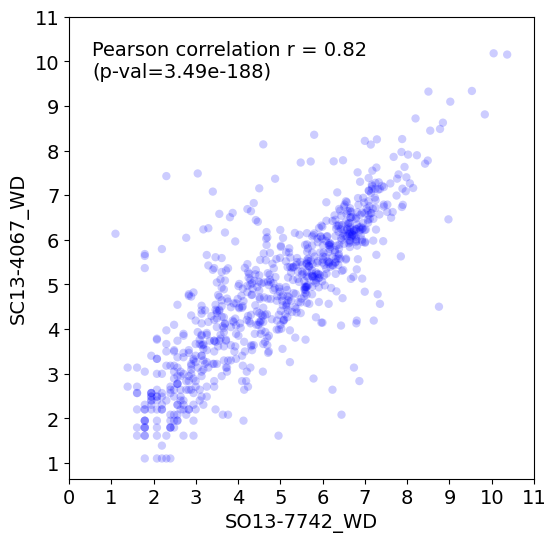

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(
    df_log["SO13-7742_WD"],
    df_log["SC13-4067_WD"],
    color="blue",
    alpha=0.2,
    edgecolors="none",
)

plt.xlabel("SO13-7742_WD", fontsize=14)
plt.ylabel("SC13-4067_WD", fontsize=14)
plt.title("")
plt.grid(False)

plt.xticks(range(0, 12, 1), fontsize=14)  
plt.yticks(range(1, 12, 1), fontsize=14)  


r, p = stats.pearsonr(df_log["SO13-7742_WD"], df_log["SC13-4067_WD"])
correlation_text = "Pearson correlation r = {:.2f}".format(r) + "\n(p-val={:.2e})".format(p)
plt.text(0.05, 0.95, correlation_text, transform=plt.gca().transAxes, va="top", fontsize=14)

# Show the plot

plt.savefig("SO13-7742_WD__SC13-4067_WD_Correlation_r.pdf")

plt.show()



In [10]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df_log is your DataFrame

[r, p] = stats.pearsonr(df_log.loc[:,'SC15-651_PD'].tolist(), df_log.loc[:,'SC15-383_PD'].tolist())

chart_spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "encoding": {},
  "layer": [
    {
      "layer": [
        {
          "mark": {
            "type": "circle",
            "tooltip": True,
            "color": "#4c78a8",
            "clip": True
          },
          "encoding": {
            "x": {
              "field": "SC15-651_HG",
              "type": "quantitative",
              "sort": None,
              "scale": {
                "zero": False,
                "type": "linear"
              },
              "formatType": "numberFormatFromNumberType",
              "format": {
                "type": "default",
                "decimals": None
              }
            },
            "y": {
              "field": "SC15-383_HG",
              "type": "quantitative",
              "sort": None,
              "scale": {
                "zero": False,
                "type": "linear"
              },
              "formatType": "numberFormatFromNumberType",
              "format": {
                "type": "default",
                "decimals": None
              }
            },
            "opacity": {
              "condition": {
                "test": {
                  "and": [
                    {
                      "param": "legend_size_0"
                    },
                    {
                      "param": "legend_color_0"
                    },
                    {
                      "param": "interval_selection"
                    }
                  ]
                },
                "value": 1
              },
              "value": 0.2
            }
          },
          "params": [
            {
              "name": "legend_size_0",
              "select": {
                "type": "point",
                "encodings": [
                  "size"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "legend_color_0",
              "select": {
                "type": "point",
                "encodings": [
                  "color"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "interval_selection",
              "select": {
                "type": "interval",
                "encodings": [
                  "x",
                  "y"
                ]
              }
            }
          ]
        }
      ]
    },
    {
      "mark": {
        "type": "text",
        "align": "left",
        "baseline": "middle",
        "fontSize": 12,
        "fontWeight": "normal",
        "color": "#000000"
      },
      "encoding": {
        "text": {
          "signal": "datum.label",
          "value": "Pearson correlation r = {:.2f} (p-val={:.2e})".format(r, p)
        },
        "x": {"value": 10},
        "y": {"value": 10}
      }
    }
  ],
  "title": "",
  "config": {
    "legend": {
      "labelFont": "Inter, sans-serif",
      "labelFontSize": 12,
      "titleFont": "Inter, sans-serif",
      "titleFontSize": 12,
      "titleFontWeight": "bold"
    },
    "title": {
      "anchor": "start",
      "color": "#40566C",
      "font": "Inter, sans-serif",
      "fontSize": 16,
      "fontWeight": "normal",
      "dy": -16
    },
    "axis": {
      "labelFont": "Inter, sans-serif",
      "labelFontSize": 12,
      "labelFontWeight": "normal",
      "titleFont": "Inter, sans-serif",
      "titleFontSize": 12,
      "titleFontWeight": "bold",
      "labelOverlap": "parity"
    },
    "customFormatTypes": True
  },
  "height": 440,
  "width": "container",
  "padding": 32,
  "autosize": {
    "type": "fit"
  }
}

DeepnoteChart(df_log, spec_dict=chart_spec)

In [11]:
import pandas as pd
import numpy as np
from scipy import stats

[r, p] = stats.pearsonr(df_log.loc[:,'SC15-651_PD'].tolist(), df_log.loc[:,'SC15-383_PD'].tolist())

chart_spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "encoding": {},
  "layer": [
    {
      "layer": [
        {
          "mark": {
            "type": "circle",
            "tooltip": True,
            "color": "#4c78a8",
            "clip": True
          },
          "encoding": {
            "x": {
              "field": "SC15-651_HG",
              "type": "quantitative",
              "sort": None,
              "scale": {
                "zero": False,
                "type": "linear"
              },
              "formatType": "numberFormatFromNumberType",
              "format": {
                "type": "default",
                "decimals": None
              }
            },
            "y": {
              "field": "SC15-383_HG",
              "type": "quantitative",
              "sort": None,
              "scale": {
                "zero": False,
                "type": "linear"
              },
              "formatType": "numberFormatFromNumberType",
              "format": {
                "type": "default",
                "decimals": None
              }
            },
            "opacity": {
              "condition": {
                "test": {
                  "and": [
                    {
                      "param": "legend_size_0"
                    },
                    {
                      "param": "legend_color_0"
                    },
                    {
                      "param": "interval_selection"
                    }
                  ]
                },
                "value": 1
              },
              "value": 0.2
            }
          },
          "params": [
            {
              "name": "legend_size_0",
              "select": {
                "type": "point",
                "encodings": [
                  "size"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "legend_color_0",
              "select": {
                "type": "point",
                "encodings": [
                  "color"
                ],
                "toggle": "true"
              },
              "bind": "legend"
            },
            {
              "name": "interval_selection",
              "select": {
                "type": "interval",
                "encodings": [
                  "x",
                  "y"
                ]
              }
            }
          ]
        }
      ]
    },
    {
      "mark": {
        "type": "text",
        "align": "left",
        "baseline": "middle",
        "fontSize": 12,
        "fontWeight": "normal",
        "color": "#000000"
      },
      "encoding": {
        "text": {
          "signal": "datum.label",
          "value": "Pearson correlation r = {:.2f} (p-val={:.2e})".format(r, p)
        },
        "x": {"value": 10},
        "y": {"value": 10}
      }
    }
  ],
  "title": "",
  "config": {
    "legend": {
      "labelFont": "Inter, sans-serif",
      "labelFontSize": 12,
      "titleFont": "Inter, sans-serif",
      "titleFontSize": 12,
      "titleFontWeight": "bold"
    },
    "title": {
      "anchor": "start",
      "color": "#40566C",
      "font": "Inter, sans-serif",
      "fontSize": 16,
      "fontWeight": "normal",
      "dy": -16
    },
    "axis": {
      "labelFont": "Inter, sans-serif",
      "labelFontSize": 12,
      "labelFontWeight": "normal",
      "titleFont": "Inter, sans-serif",
      "titleFontSize": 12,
      "titleFontWeight": "bold",
      "labelOverlap": "parity"
    },
    "customFormatTypes": True
  },
  "height": 440,
  "width": "container",
  "padding": 32,
  "autosize": {
    "type": "fit"
  }
}

DeepnoteChart(df_log, spec_dict=chart_spec)


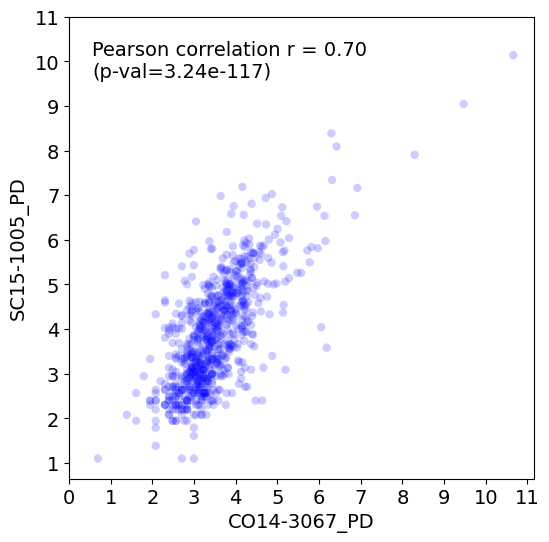

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(
    df_log["CO14-3067_PD"],
    df_log["SC15-1005_PD"],
    color="blue",
    alpha=0.2,
    edgecolors="none",
)

plt.xlabel("CO14-3067_PD", fontsize=14)
plt.ylabel("SC15-1005_PD", fontsize=14)
plt.title("")
plt.grid(False)

plt.xticks(range(0, 12, 1), fontsize=14)  
plt.yticks(range(1, 12, 1), fontsize=14)  


r, p = stats.pearsonr(df_log["CO14-3067_PD"], df_log["SC15-1005_PD"])
correlation_text = "Pearson correlation r = {:.2f}".format(r) + "\n(p-val={:.2e})".format(p)
plt.text(0.05, 0.95, correlation_text, transform=plt.gca().transAxes, va="top", fontsize=14)

# Show the plot

plt.savefig("CO14-3067_PD__SC15-1005_PD_Correlation_r.png")

plt.show()

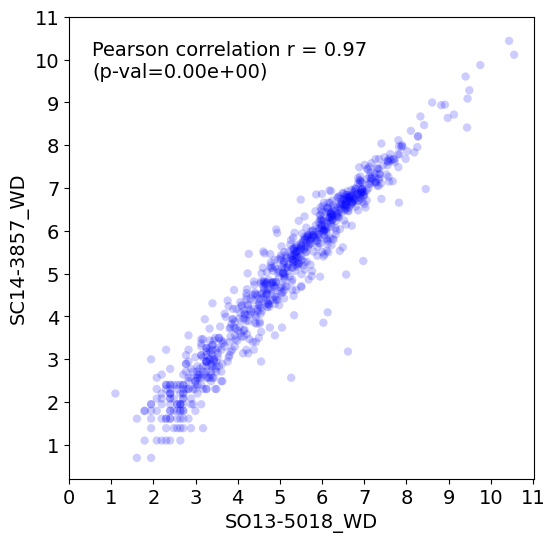

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(
    df_log["SO13-5018_WD"],
    df_log["SC14-3857_WD"],
    color="blue",
    alpha=0.2,
    edgecolors="none",
)

plt.xlabel("SO13-5018_WD", fontsize=14)
plt.ylabel("SC14-3857_WD", fontsize=14)
plt.grid(False)

plt.xticks(range(0, 12, 1), fontsize=14)  
plt.yticks(range(1, 12, 1), fontsize=14)  


r, p = stats.pearsonr(df_log["SO13-5018_WD"], df_log["SC14-3857_WD"])
correlation_text = "Pearson correlation r = {:.2f}".format(r) + "\n(p-val={:.2e})".format(p)
plt.text(0.05, 0.95, correlation_text, transform=plt.gca().transAxes, va="top", fontsize=14)

plt.savefig("SO13-5018_WD__SC14-3857_WD_Correlation_r.pdf")

plt.show()

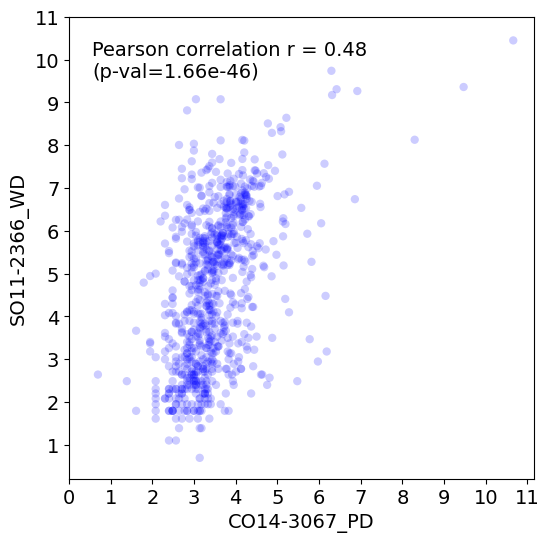

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(
    df_log["CO14-3067_PD"],
    df_log["SO11-2366_WD"],
    color="blue",
    alpha=0.2,
    edgecolors="none",
)

plt.xlabel("CO14-3067_PD", fontsize=14)
plt.ylabel("SO11-2366_WD", fontsize=14)
plt.grid(False)

plt.xticks(range(0, 12, 1), fontsize=14)  
plt.yticks(range(1, 12, 1), fontsize=14)  


r, p = stats.pearsonr(df_log["CO14-3067_PD"], df_log["SO11-2366_WD"])
correlation_text = "Pearson correlation r = {:.2f}".format(r) + "\n(p-val={:.2e})".format(p)
plt.text(0.05, 0.95, correlation_text, transform=plt.gca().transAxes, va="top", fontsize=14)

plt.savefig("CO14-3067_PD__SO11-2366_WD_Correlation_r.pdf")

plt.show()

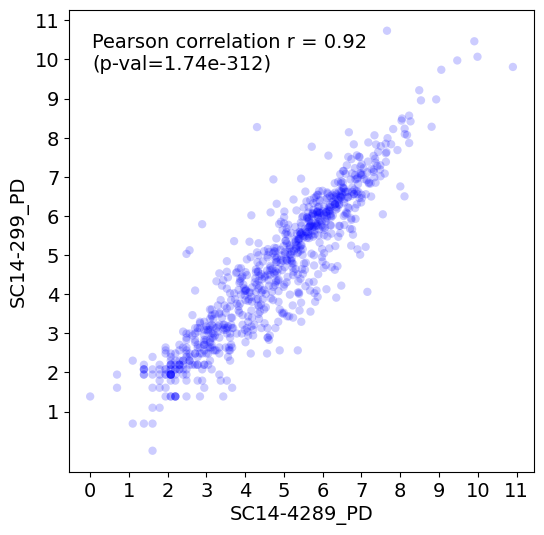

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(
    df_log["SC14-4289_PD"],
    df_log["SC14-299_PD"],
    color="blue",
    alpha=0.2,
    edgecolors="none",
)

plt.xlabel("SC14-4289_PD", fontsize=14)
plt.ylabel("SC14-299_PD", fontsize=14)
plt.grid(False)

plt.xticks(range(0, 12, 1), fontsize=14)  
plt.yticks(range(1, 12, 1), fontsize=14)  


r, p = stats.pearsonr(df_log["SC14-4289_PD"], df_log["SC14-299_PD"])
correlation_text = "Pearson correlation r = {:.2f}".format(r) + "\n(p-val={:.2e})".format(p)
plt.text(0.05, 0.95, correlation_text, transform=plt.gca().transAxes, va="top", fontsize=14)

plt.savefig("SC14-4289_PD__SC14-299_PD_Correlation_r.pdf")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=479021a8-7c58-4ce8-a173-5b75b64309eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>